# IPL Analysis

# import required packages

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read CSV File

In [40]:
#os.chdir("D://Files")
df_matches = pd.read_csv('matches.csv')

df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [41]:
df_matches.shape

(636, 18)

# Get top-level summary

In [42]:
df_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [ ]:
df_matches.describe(include='top')

In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

# 1. What is the total number of Matches played and the total number of Seasons?

In [6]:
print("Number of matches played so far : ", df_matches.shape[0])
print("Number of seasons : ", df_matches['season'].nunique())
#len(matches['season'].unique())

Number of matches played so far :  636
Number of seasons :  10


# 2. Players who have won the most “Player of the Match” and Team which has the highest number of match wins.

In [7]:
#print("Most Player of the Match: ",df_matches['player_of_match'].value_counts()[:10])
print((df_matches['player_of_match'].value_counts()).idxmax(),' : has most man of the match awards')
# idxmax() return index of first occurrence of maximum 
print(((df_matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

CH Gayle  : has most man of the match awards
Mumbai Indians : has the highest number of match wins


<AxesSubplot:xlabel='winner'>

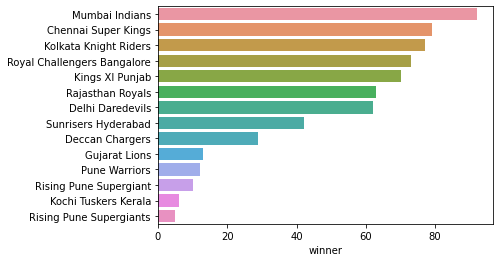

In [8]:
data=df_matches['winner'].value_counts()
sns.barplot(y=data.index,x=data,orient='h')

# 3. Which season had most number of matches?

In [9]:
print((df_matches['season'].value_counts()).idxmax(),' season had most number of matches')

2013  season had most number of matches


<AxesSubplot:xlabel='season', ylabel='count'>

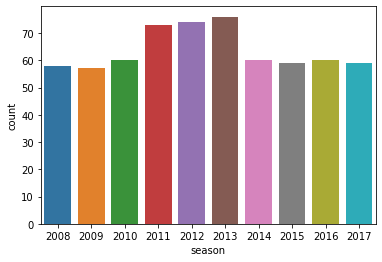

In [10]:
sns.countplot(x='season', data=df_matches)

# 4. Find out count of matches played at each city

In [11]:
#df_matches.groupby(['city']).size()
#df_matches['city'].value_counts()
df_matches.groupby(['city']).size().sort_values(ascending=False)

city
Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Cuttack            7
Ranchi             7
Port Elizabeth     7
Abu Dhabi          7
Raipur             6
Sharjah            6
Indore             5
Kochi              5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
dtype: int64

# 5.Find the city that hosted the maximum number of IPL matches

In [12]:
x=df_matches['city'].value_counts()

In [13]:
x

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Ranchi             7
Port Elizabeth     7
Cuttack            7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
Nagpur             3
Kimberley          3
East London        3
Bloemfontein       2
Name: city, dtype: int64

<AxesSubplot:>

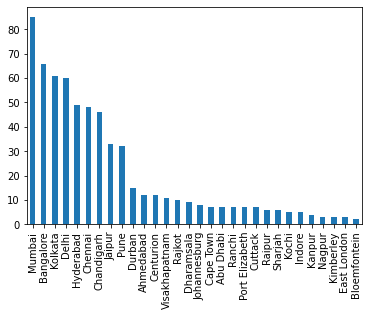

In [14]:
x.plot(kind='bar')

# 6.Find the match results of the season 2017

In [15]:
df=df_matches[df_matches['season']==2017]['result'].value_counts()
#df['result'].value_counts()

In [16]:
df

normal    58
tie        1
Name: result, dtype: int64

# 7. Find the missing values in the dataset and treat them

In [17]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [18]:
df_matches.isnull().sum()/df_matches.shape[0]

id                 0.000000
season             0.000000
city               0.011006
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.004717
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.004717
venue              0.000000
umpire1            0.001572
umpire2            0.001572
umpire3            1.000000
dtype: float64

In [19]:
df_matches.shape

(636, 18)

In [20]:
# Missing value Treatment

In [21]:
# remove umpire3 variable
df_matches=df_matches.drop('umpire3',axis=1)

In [22]:
# Remove the missing values observations
df_matches.dropna(axis=0,inplace=True)
#0, or ‘index’ : Drop rows which contain missing values.
#1, or ‘columns’ : Drop columns which contain missing value.

### Additional Insights

# The venue that hosted the maximum number of matches

In [23]:
venue_ser = df_matches['venue'].value_counts()

<AxesSubplot:>

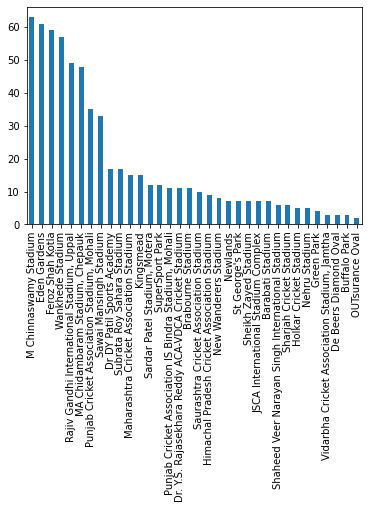

In [24]:
venue_ser.plot(kind='bar')

In [25]:
venue_ser

M Chinnaswamy Stadium                                   63
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [26]:
#Which Team had won by maximum wickets?

df_matches.iloc[df_matches['win_by_wickets'].idxmax()]
#((df_matches['win_by_wickets']).value_counts())

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

Insights

+ Mumbai Indians is the most successful team in IPL.

+ Chris Gayle has won the maximum number of player of the match title.

+ 2013  season had most number of matches

+ M Chinnaswamy Stadium has hosted the maximum number of IPL matches followed by Eden Gardens and Feroz Stadium.
 
+ Mumbai Indians has won the most number of toss.

In [27]:
#Which stadium is best for winning by runs?
#df_matches.venue[df_matches.win_by_runs!=0].mode()

In [28]:
#Which stadium is best for winning by wickets?
#df_matches.venue[df_matches.win_by_wickets!=0].mode()

C:\Users\Nithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

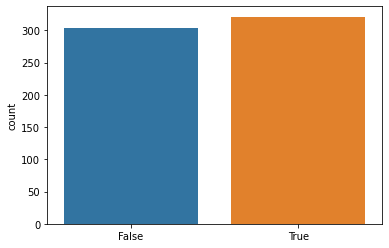

In [29]:
#graphical analysis to describe some  patterns:

#Has Toss-winning helped in Match-winning?
x = df_matches['toss_winner'] == df_matches['winner']

sns.countplot(x)

C:\Users\Nithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toss_decision', ylabel='count'>

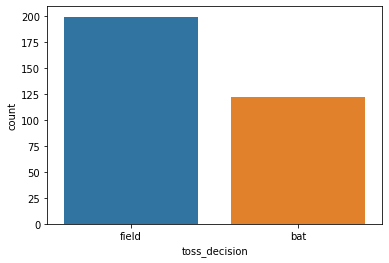

In [30]:
#Does choosing batting or bowling first helped in match winning?
sns.countplot(df_matches.toss_decision[df_matches.toss_winner==df_matches.winner])

C:\Users\Nithya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='win_by_runs'>

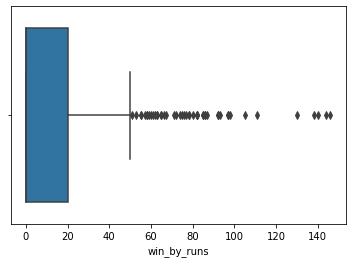

In [54]:
#outlier
sns.boxplot(df_matches['win_by_runs'])

In [45]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [46]:
data=df_matches[['win_by_runs','win_by_wickets']]

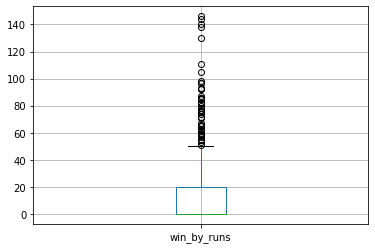

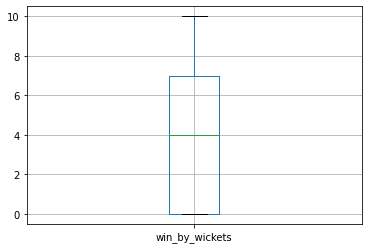

In [47]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

win_by_runs having many outliers as shown by the BoxPlot. The boxplot is influenced by the low level values in the dataet. In fact these are not actual outliers and this appers to be outliers because of the low run values present in the data.

In [61]:
import numpy as np
mean = np.mean(df_matches['win_by_runs'])
std = np.std(df_matches['win_by_runs'])
threshold = 3
outlier = []
for i in df_matches['win_by_runs']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [97, 146, 140, 105, 92, 92, 98, 111, 86, 87, 86, 130, 93, 97, 138, 144]


In [33]:
df_matches=pd.get_dummies(df_matches)


from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_matches[['season','win_by_runs']]
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)                         
 

       feature       VIF
0       season  1.331963
1  win_by_runs  1.331963
